# 항공사 지연 데이터 분석 프로젝트

프로젝트 개요
본 프로젝트는 항공 운항 지연의 주요 원인을 파악하고, 항공사별 지연 특성과 패턴을 비교 분석함으로써 **항공지연 문제에 대한 데이터 기반 인사이트**를 도출하는 것에 목적이 있다.

- 데이터 출처
출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

항공사별 지연율 데이터 (총 33,468건)

주요 컬럼:

- pct_carrier_delay: 항공사 내부 사정으로 인한 지연 비율
- pct_atc_delay: 항공 교통 통제로 인한 지연 비율
- pct_weather_delay: 기상 조건으로 인한 지연 비율
airline: 항공사명

In [ ]:
import pandas as pd

df = pd.read_csv("/content/airline_stats.csv")
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [ ]:
# 데이터 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [ ]:
df_na = df[df.isnull().any(axis=1)] # any: True 가 하나라도 있는 지 판단.
df_na['airline'].value_counts()

,count
airline,
Delta,12
United,12
Jet Blue,2
American,2


In [ ]:
df['airline'].value_counts()

,count
airline,
Delta,9107
American,5725
Southwest,5584
United,5426
Alaska,3851
Jet Blue,3775



# 2. 데이터 전처리

2.1 결측치 탐색

- 결측치가 있는 변수: pct_carrier_delay, pct_atc_delay, pct_weather_delay (각 28건)

2.2 결측치 처리

- 방안 A: 행 제거 (dropna)

- 방안 B: 평균으로 대체 (fillna)

- 방안 C: 항공사별 평균으로 대체 (groupby().transform())

- 세 가지 방식의 처리 후 분포 비교 및 통계 요약 포함

In [ ]:
# 방안 A
df_dropna = df.dropna()

# 방안 B
col = ['pct_carrier_delay','pct_atc_delay','pct_weather_delay']
df_fillna = df.copy()
for i in col:
  df_fillna[i] = df_fillna[i].fillna(df[i].mean())

# 방안 C
df_group = df.copy()
for i in col:
  df_group[i] = df.groupby('airline')[i].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# 결측치가 잘 채워졌는지 확인
df_dropna.info()
print("="*50)
df_group.info()
print("="*50)
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33440 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33440 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33468 non-null  float64
 1   pct_atc_delay      33468 non-null  float64
 2   pct_weather_delay  33468 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 

In [ ]:
print(df_dropna.describe())
print("="*60)
print(df_fillna.describe())
print("="*60)
print(df_group.describe())

       pct_carrier_delay  pct_atc_delay  pct_weather_delay
count       33440.000000   33440.000000       33440.000000
mean            7.041475       5.089962           0.684776
std             4.497596       4.718647           1.073743
min             0.000000       0.000000           0.000000
25%             4.145455       2.146565           0.000000
50%             6.356893       3.900000           0.316002
75%             9.140474       6.630238           0.935161
max           100.000000     100.000000          33.333333
       pct_carrier_delay  pct_atc_delay  pct_weather_delay
count       33468.000000   33468.000000       33468.000000
mean            7.041475       5.089962           0.684776
std             4.495714       4.716672           1.073294
min             0.000000       0.000000           0.000000
25%             4.147084       2.148281           0.000000
50%             6.359631       3.903367           0.316655
75%             9.136141       6.625000           0.9345

/tmp/ipython-input-43-3988653712.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([df_dropna[i] for i in col], labels=col)
/tmp/ipython-input-43-3988653712.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot([df_fillna[i] for i in col], labels=col)
/tmp/ipython-input-43-3988653712.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[2].boxplot([df_group[i] for i in col], labels=col)


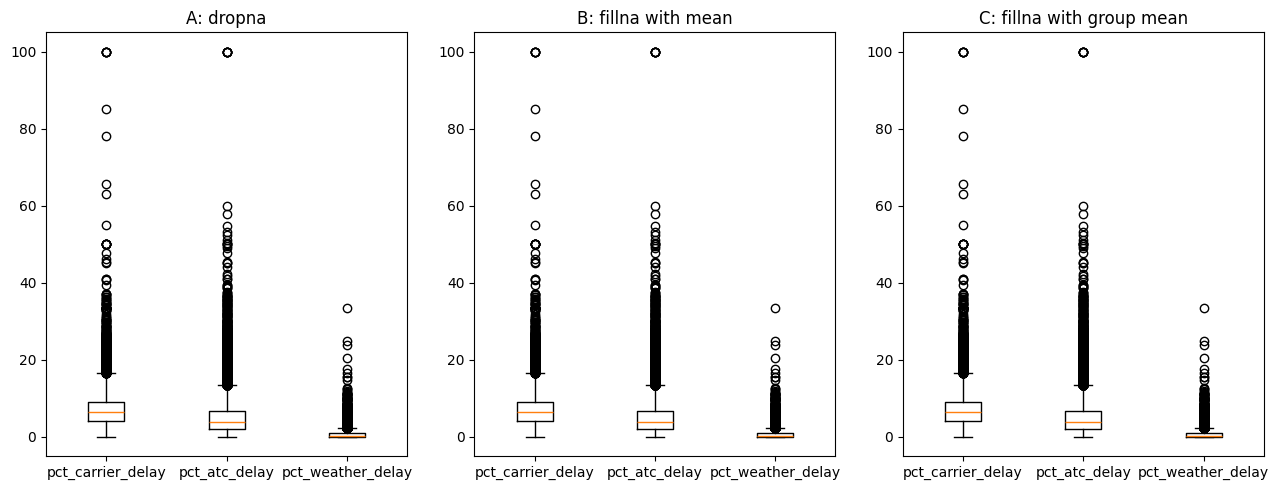

In [ ]:
import matplotlib.pyplot as plt

# 박스플롯 그리기
fig, axs = plt.subplots(1, 3, figsize=(13, 5))

# 각 방안의 박스플롯
axs[0].boxplot([df_dropna[i] for i in col], labels=col)
axs[0].set_title("A: dropna")

axs[1].boxplot([df_fillna[i] for i in col], labels=col)
axs[1].set_title("B: fillna with mean")

axs[2].boxplot([df_group[i] for i in col], labels=col)
axs[2].set_title("C: fillna with group mean")

plt.tight_layout()
plt.show()

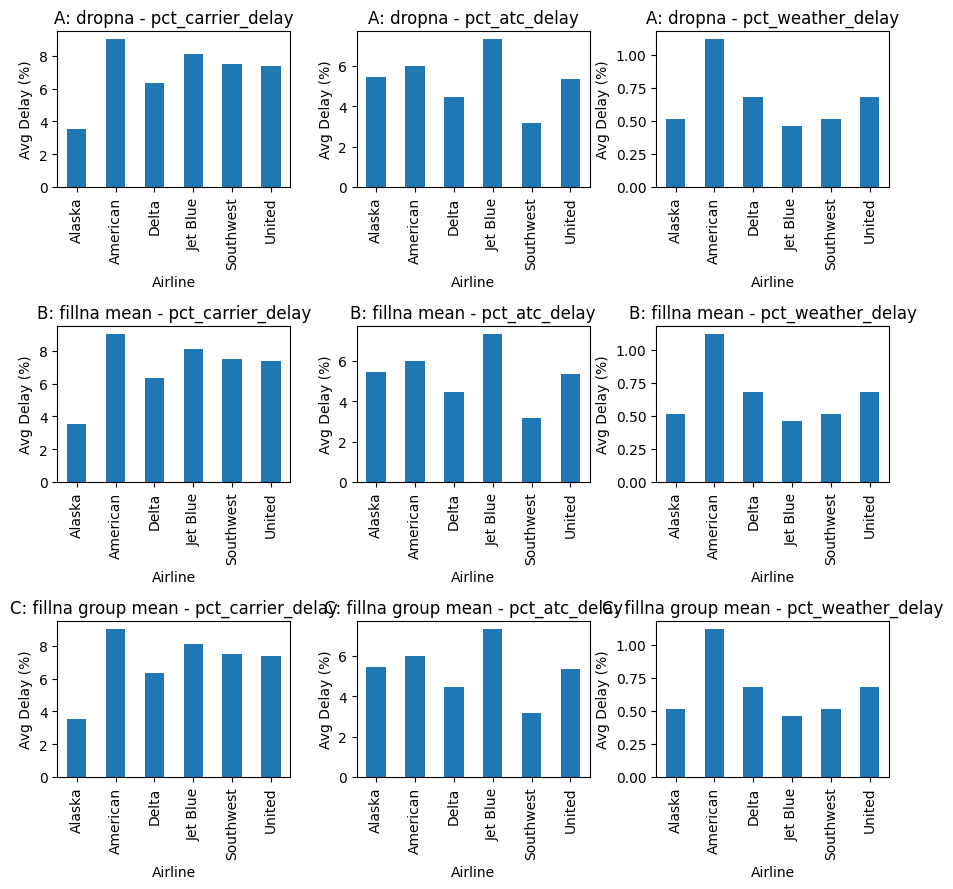

In [ ]:
# 막대그래프 시각화
fig, axs = plt.subplots(3, 3, figsize=(9, 9))  # 3행 x 3열, 9x9 인치

# 데이터프레임 리스트
dfs = [df_dropna, df_fillna, df_group]
titles = ['A: dropna', 'B: fillna mean', 'C: fillna group mean']

# 루프 돌며 그래프 그림
for row in range(3):  # A, B, C
    for col_idx in range(3):  # 3개 지연 요인
        ax = axs[row, col_idx]
        dfs[row].groupby('airline')[col[col_idx]].mean().plot(kind='bar', ax=ax)
        ax.set_title(f"{titles[row]} - {col[col_idx]}")
        ax.set_xlabel('Airline')
        ax.set_ylabel('Avg Delay (%)')

plt.tight_layout()
plt.show()

## 결과 해석
- 데이터의 결측치가 28행이 있고 airline 정보는 가지고 있음.

- 결측치 정보:Delta	12, United	12, Jet Blue	2, American	2

- 방안 3개를 비교하여 알아본 결과

 1. 평균: 소수점 4자리 까지 유사 → 전체분포에 큰 영향을 주지 않음.
 2. 표준편차: df_dropna와 df_fillna의 차이가 있어 변동성의 왜곡이 있을 수 있음.

 3.  pct_weather_delay의 25%가 0.000 → 많은 항목에서 지연이 아예 없다는 뜻

 4. 박스플롯을 봤을 때 이상치가 전체적으로 많음.

 5. 막대차트에서 방안 3개의 그래프가 유사하고 순서도 바뀐게 없음.

 ---

**결론: 결측치를 대체할 만한 이유를 찾지 못하였으며 (결측치 항공사 데이터 수/ 전체 데이터 수) 가 0.01이 되지 않음. 따라서 df_drop로 분석을 시행하겠음.**


# 3. 탐색적 데이터 분석 (EDA)

3.1 변수별 분포

- 히스토그램 및 상자그림(boxplot) 시각화
- 이상치(outlier) 여부 확인

3.2 항공사별 비교

- 항공사별 평균 지연율 비교 (막대그래프)

- 항공사별 상자그림 비교

array([[<Axes: title={'center': 'pct_carrier_delay'}>,
        <Axes: title={'center': 'pct_atc_delay'}>],
       [<Axes: title={'center': 'pct_weather_delay'}>, <Axes: >]],
      dtype=object)

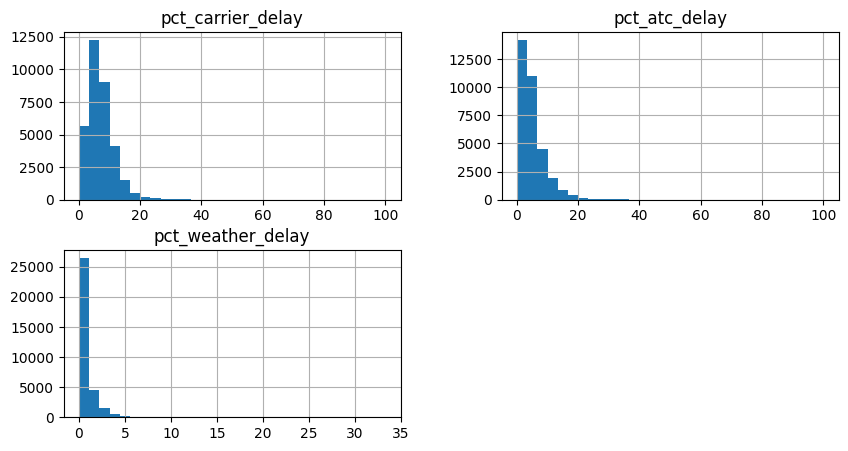

In [ ]:
# 변수별 분포: 히스토그램
df_dropna[col].hist(bins=30, figsize=(10, 5))

전체적으로 weather 의 지연율이 낮고, carrier의 지연율이 높다.

<Axes: >

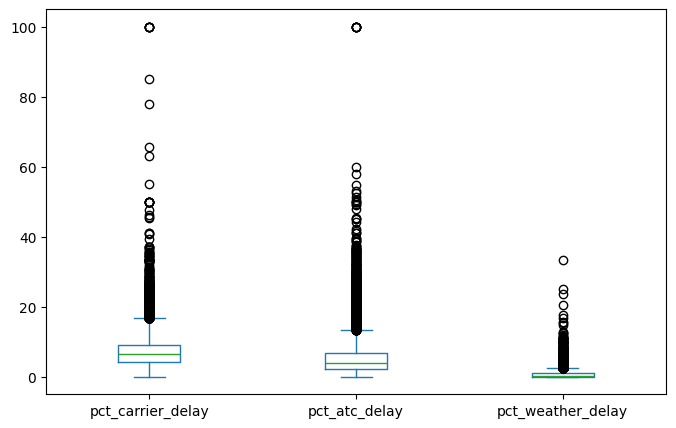

In [ ]:
# 변수별 분포: 박스플롯
df_dropna[col].plot(kind='box', figsize=(8, 5))

전체의 분포는 위와 같은 그래프의 양상이 나타나지만 항공사 별로 이상값이 몰린 항공사도 있을테고 항공사 별로 지연 칼럼들의 분포가 달라질 수 있어 확인이 필요함.

In [ ]:
# 항공사별 비교: 항공사별 평균 지연을 비교
print(df_dropna.groupby('airline')[col].mean())

           pct_carrier_delay  pct_atc_delay  pct_weather_delay
airline                                                       
Alaska              3.521889       5.472672           0.513497
American            9.042180       5.993529           1.122920
Delta               6.333460       4.462978           0.680765
Jet Blue            8.081843       7.345231           0.465327
Southwest           7.521997       3.147019           0.512611
United              7.398833       5.348133           0.680697


In [ ]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

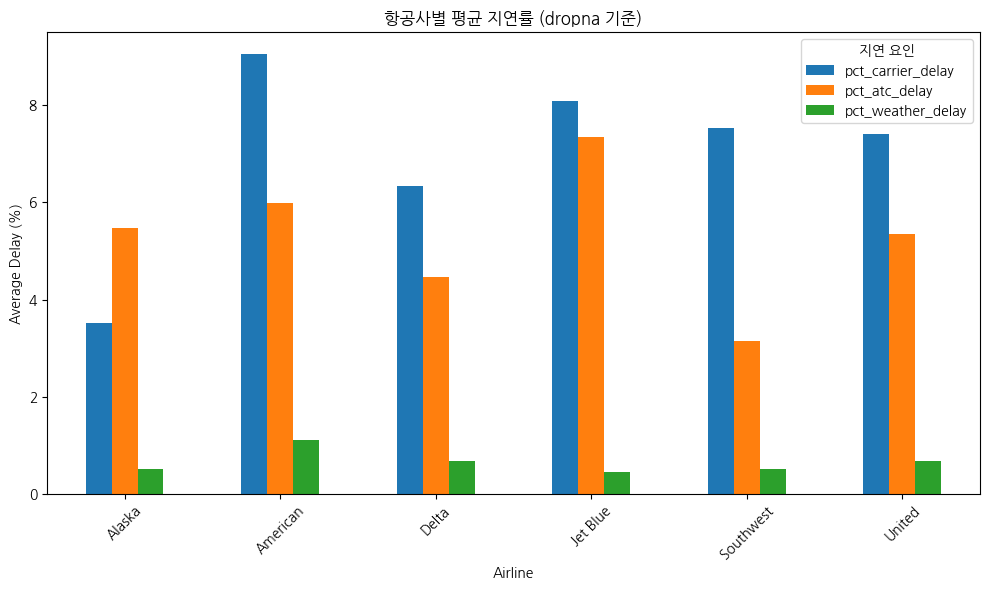

In [ ]:
airline_means = df_dropna.groupby('airline')[col].mean()

# 막대그래프 그리기
airline_means.plot(kind='bar', figsize=(10, 6))
plt.title("항공사별 평균 지연률 (dropna 기준)")
plt.ylabel("Average Delay (%)")
plt.xlabel("Airline")
plt.xticks(rotation=45)
plt.legend(title="지연 요인")
plt.tight_layout()
plt.show()



항공사별 지연요인을 그래프로 볼 때 Alaska말고는 모두 carrier > atc > weather 순서이며 날씨 지연이 현저히 적다.

In [ ]:
col = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
df_dropna.groupby('airline')[col].mean()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
airline,,,
Alaska,3.521889,5.472672,0.513497
American,9.042180,5.993529,1.122920
Delta,6.333460,4.462978,0.680765
Jet Blue,8.081843,7.345231,0.465327
Southwest,7.521997,3.147019,0.512611
United,7.398833,5.348133,0.680697


/tmp/ipython-input-64-3691526309.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dropna, x='airline', y=col, ax=axs[i], palette='Set2')


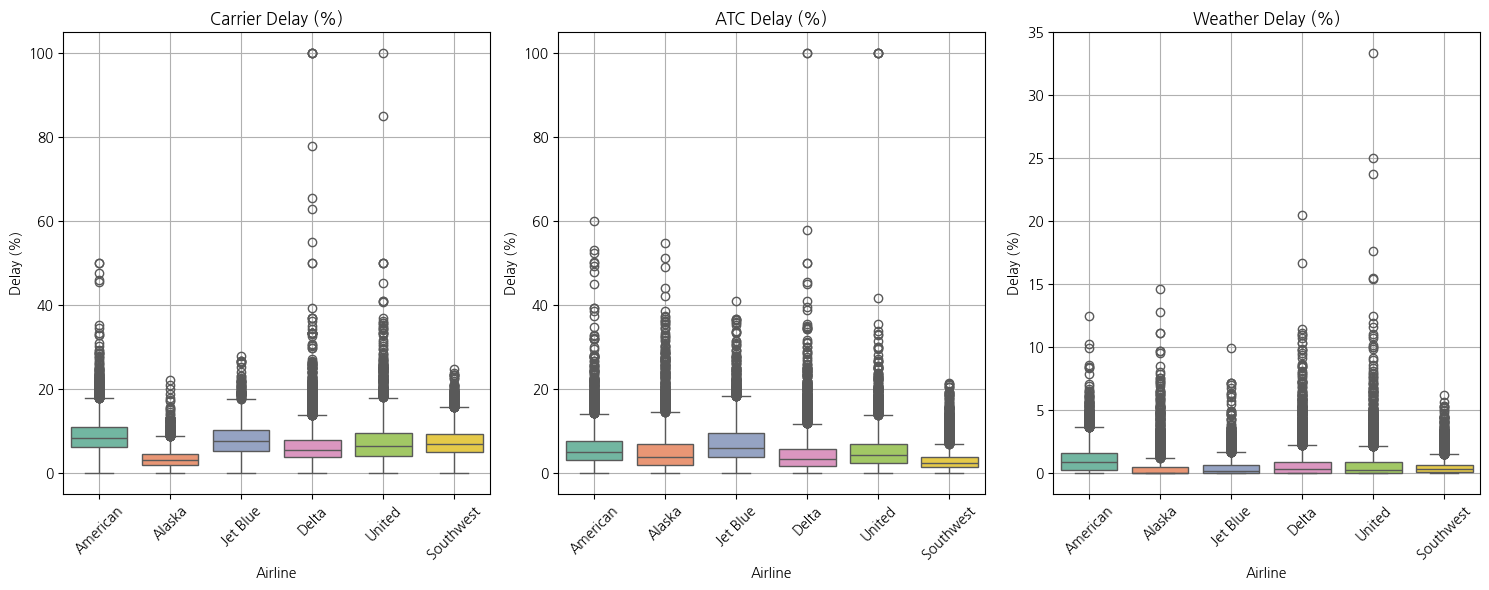

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
titles = ['Carrier Delay (%)', 'ATC Delay (%)', 'Weather Delay (%)']

fig, axs = plt.subplots(1, 3, figsize=(15, 6))

for i, col in enumerate(cols):
    sns.boxplot(data=df_dropna, x='airline', y=col, ax=axs[i], palette='Set2')
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Airline')
    axs[i].set_ylabel('Delay (%)')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

- carrier_delay: Alaska  항공사의 상자가 작고 낮게 위치하여 지연이 적고 비교적 안정적임

- atc_delay : Southwest  항공사의 상자가 작고 낮게 위치하여 지연이 적고 비교적 안정적이다. / Jet Blue 항공사의 상자가 넓고 위쪽에 위치하여 지연이 상대적으로 크고 다양함.

- Weather_delay: Alaska 항공사, Southwest  항공사가 상자가 작고 낮게 위치하여 비교적 안정적임.

# 4. 2차원 데이터 분석

4.1 공분산 및 상관계수 분석

- 운항사 vs 관제, 기상 요인 간의 연관성 파악

4.2 다중공선성 분석

- VIF(Variance Inflation Factor) 계산 및 시각화

- VIF > 10 변수에 대한 해석

In [ ]:
# 공분산이란? 두 변수 X, Y가 같은 방향으로 변화하는 정도를 수치로 나타낸 값
# 결과: 양/음 의 상관관계, 0: 관계없

# airline을 수치형으로 라벨링
df_dropna['airline_code'] = df_dropna['airline'].astype('category').cat.codes

for i in col:
  covariance = df_dropna['airline_code'].cov(df_dropna[i])
  print(f'{i}와 공분산: {covariance}')

pct_carrier_delay와 공분산: 0.9196988378342422
pct_atc_delay와 공분산: -0.5118328213445361
pct_weather_delay와 공분산: -0.11977879770866712


In [ ]:
df_dropna[['airline', 'airline_code']].drop_duplicates().sort_values('airline_code')

,airline,airline_code
79,Alaska,0
0,American,1
173,Delta,2
128,Jet Blue,3
357,Southwest,4
283,United,5


- carrier 의수치와 airline 수치는 강한 양의 상관관계를 가진다.
- atc는 음의 상관관계를 가지고 날씨는 항공사에 따른 변화가 적다.
- 라벨링된 수치가 달라지면 공분산도 달라지기 때문에 주의가 필요할 듯 싶다.

In [ ]:
# 상관계수란? 공분산을 표준편차로 나눈 값 → 단위를 없애고 비교 가능하게 만든 것
# 결과: -1~1 사이의 수

# 1. 더미변수 생성 (항공사별 컬럼 생김)
df_dummy = pd.get_dummies(df_dropna, columns=['airline'])

# 2. 비교할 대상 컬럼 설정
delay_cols = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
airline_cols = [col for col in df_dummy.columns if col.startswith('airline_')]

# 3. 항공사별 상관계수 계산
for delay_col in delay_cols:
    print(f"\n📊 {delay_col} 와 항공사별 상관계수:")
    for airline_col in airline_cols:
        corr = df_dummy[delay_col].corr(df_dummy[airline_col])
        print(f"{airline_col}: {corr:.4f}")


📊 pct_carrier_delay 와 항공사별 상관계수:
airline_code: 0.1271
airline_Alaska: -0.2823
airline_American: 0.2021
airline_Delta: -0.0962
airline_Jet Blue: 0.0825
airline_Southwest: 0.0478
airline_United: 0.0349

📊 pct_atc_delay 와 항공사별 상관계수:
airline_code: -0.0674
airline_Alaska: 0.0293
airline_American: 0.0870
airline_Delta: -0.0812
airline_Jet Blue: 0.1704
airline_Southwest: -0.1844
airline_United: 0.0240

📊 pct_weather_delay 와 항공사별 상관계수:
airline_code: -0.0693
airline_Alaska: -0.0575
airline_American: 0.1854
airline_Delta: -0.0023
airline_Jet Blue: -0.0729
airline_Southwest: -0.0718
airline_United: -0.0017


- airline_Alaska와 carrier: -0.2823(음)
- airline_American와 carrier: 0.2021(양)

공분산은 항공사 라벨링을 수치적으로 해서 상관계수의 라벨링은 원-핫 인코딩으로 해본 결과 항공사별로 지연 요인은 크게 상관관계가 없는 수치로 나왔다.

# 5. 인사이트 도출
## 운항사 지연률이 높은 항공사는 누구인가?
- American	9.042180(carrier)

 Jet Blue:7.345231(atc)

  American:1.122920(weather)

## 항공사별로 어떤 지연 요인이 더 영향을 미치는가?

- Alaska	**5.472672** (atc)

- American	**9.042180** (carrier)

- Delta **6.333460**	(carrier)

- Jet Blue	**8.081843** (carrier)

- Southwest	**7.521997** (carrier)

- United	**7.398833** (carrier)

## 정책적 개선안 제시

- American 항공사가 가장 지연이 많은 항공사로 뽑혔다. (carrier, weather )

따라서, 항공사 내부의 문제점 파악 및 기상 지연에 따른 대응 시스템 구축이나 우회 노선 구축 등을 필요로 함.

- jet blue 항공사의 atc 지연 편차가 다른 항공사에 비해 크므로 보완

따라서, 관제 지연 안정화 필요, 관제 지연 요인 분석으로 노선 구축 등이 필요함.